In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [18]:
c=cast[(cast.character=='Superman') | (cast.character=='Batman')]
k=c.groupby(['year', 'character']).size().unstack().fillna(0)
len(k[k.Batman<k.Superman])



12

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [19]:
c=cast[(cast.character=='Superman') | (cast.character=='Batman')]
k=c.groupby(['year', 'character']).size().unstack().fillna(0)
len(k[k.Batman>k.Superman])



24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

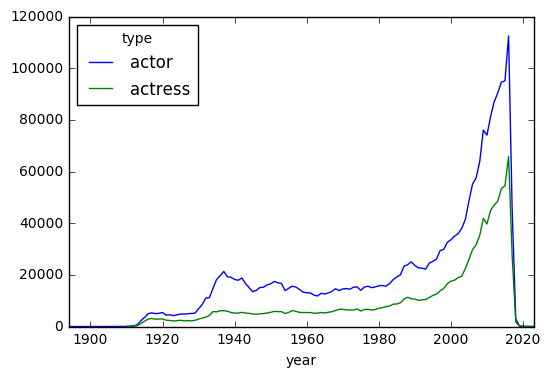

In [26]:
cast.groupby(['year', 'type']).size().unstack('type').plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

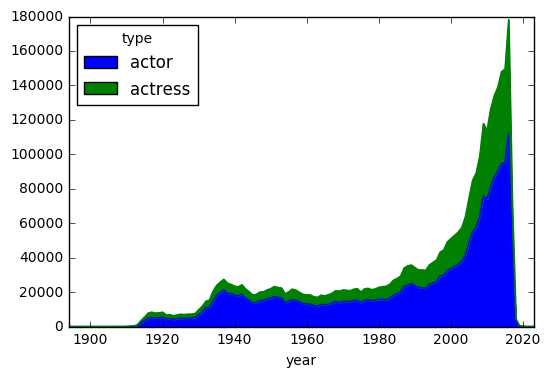

In [27]:
cast.groupby(['year', 'type']).size().unstack('type').plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

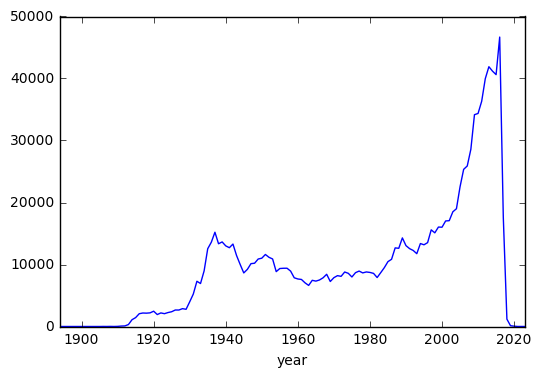

In [34]:
k=cast.groupby(['year', 'type']).size().unstack('type').fillna(0)
k['diff']=k.actor-k.actress
k['diff'].plot()


### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

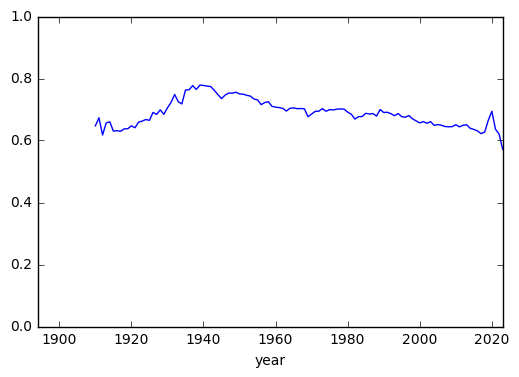

In [48]:
c=cast.groupby(['year', 'type']).size()
c=c.unstack('type')
k=c.actor/(c.actor+c.actress)
k.plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

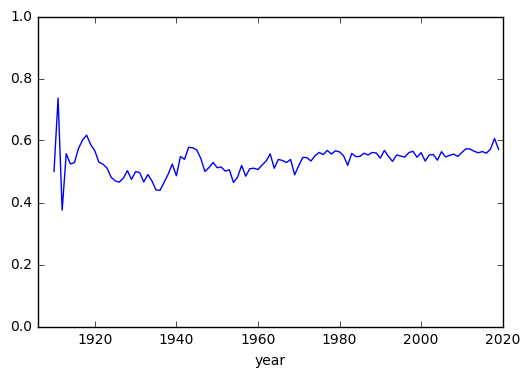

In [49]:
c=cast[cast.n==2].groupby(['year', 'type']).size()
c=c.unstack('type')
k=c.actor/(c.actor+c.actress)
k.plot(ylim=[0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

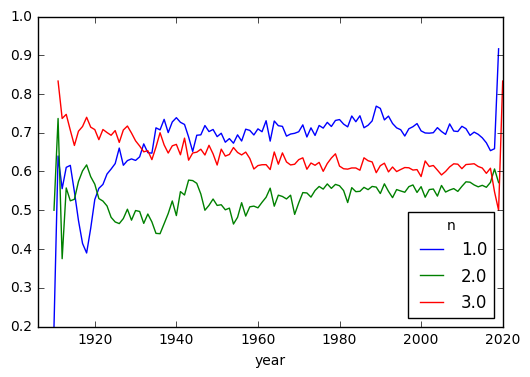

In [69]:
c=cast[cast.n<=3].groupby(['year', 'type','n']).size()
c=c.unstack('type')
c['f']=c.actor/(c.actor+c.actress)
r=c.unstack('n')
r.f.plot()